Basic ML (1 real input and 1 real output) - Polinomial regression + Regularization

In [69]:
import numpy as np # numerical things
import numpy.matlib as nml # matricial computations
import matplotlib.pyplot as plt # plots

In [70]:
# fixing the seed of the random allows us to obtain the same results
np.random.seed(13) # usually better to use a prime number

In [71]:
# oracle = function (math) /system (ML) that I want to aproximate (in this case a parabola)
def oracle(x):
  return x**2 # I suppose x can be [0,1]

In [72]:
# Sample some data from the oracle
n = 10 # number of samples of the dataset
sigma = 0.2 # sigma = power of the noise; std gaussian noise (I want my measurement to be realistic)
nt = 1000 # numer of data we use for test (to see what we actually learnt from the data);
          # used to estimate the true error L(f) of the model (not pox in real life bc we do not have the system, here we have the oracle)

In [73]:
# Collect our dataset
x = np.random.rand(n) # randomly sample; x equally distributed in [0,1]
y = oracle(x) + sigma * np.random.randn(n) # y is corrupted by a random (Gaussian) noise; corrupts my ability to measure the obstacle

In [74]:
# Fot the test
xt = np.linspace(0,1,nt)
yt = oracle(xt) # not pox in real life (we do not know our system), we can do it because we have the oracle

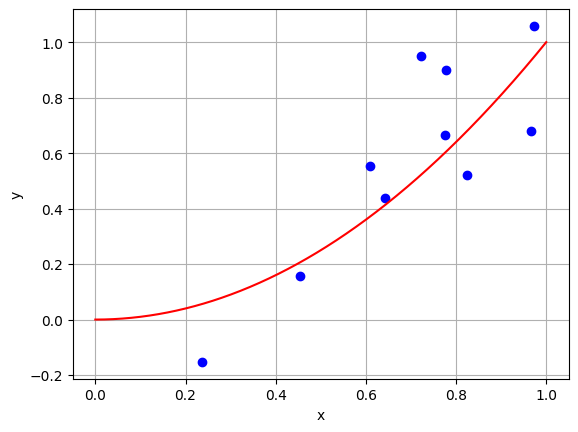

In [75]:
fig, ax = plt.subplots()
ax.plot(x,y, 'bo') # blue points
ax.plot(xt,yt, 'r') # red line
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid() # acrivate the grid
plt.show()

Polinomial regression (MSE)

In [76]:
p = 2
x = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()
X = nml.ones((n,1))
for i in range (1, p+1):
  X = np.concatenate((x,np.power(x,i)), axis=1)
# (X'* X) c = X'* y
c = np.linalg.solve(np.matmul(np.transpose(X),X), np.matmul(np.transpose(X),y))

In [77]:
xt = np.asmatrix(xt).transpose()
yt = np.asmatrix(yt).transpose()
Xt = nml.ones((nt,1))
for i in range (1, p+1):
  Xt = np.concatenate((xt,np.power(xt,i)), axis=1)
yp = np.matmul(Xt,c)

In [78]:
err = np.mean(np.power(yt-yp,2))
print("err:", err)

err: 0.004456693799966432
